In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
X_raw=pd.read_csv("data_train.csv",sep=",")
X_raw ###school holiday: 0 = no school holiday  1 = school holiday 
#bank holiday:
#0 = no bank holiday
#1 = bank holiday

,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
0,2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,0,0,0,0,915
1,2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1057
2,2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1482
3,2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1883
4,2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,2009-12-27,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,1524
1739,2009-12-28,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,1542
1740,2009-12-29,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,1922
1741,2009-12-30,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,1576


In [3]:
df_weather=pd.read_csv("weather.csv",sep=",")

In [4]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1743 non-null   object 
 1   bank_holiday    1743 non-null   int64  
 2   feature_0       1743 non-null   int64  
 3   feature_1       1743 non-null   int64  
 4   feature_2       1743 non-null   int64  
 5   feature_3       1743 non-null   float64
 6   feature_4       1743 non-null   float64
 7   feature_5       1743 non-null   float64
 8   feature_6       1743 non-null   float64
 9   feature_7       1743 non-null   int64  
 10  school_holiday  1743 non-null   int64  
 11  feature_8       1743 non-null   int64  
 12  feature_9       1743 non-null   int64  
 13  feature_10      1743 non-null   int64  
 14  label           1743 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 204.4+ KB


In [5]:
X_raw["date"]=X_raw.astype("datetime64[ns]")

In [6]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1743 non-null   datetime64[ns]
 1   bank_holiday    1743 non-null   int64         
 2   feature_0       1743 non-null   int64         
 3   feature_1       1743 non-null   int64         
 4   feature_2       1743 non-null   int64         
 5   feature_3       1743 non-null   float64       
 6   feature_4       1743 non-null   float64       
 7   feature_5       1743 non-null   float64       
 8   feature_6       1743 non-null   float64       
 9   feature_7       1743 non-null   int64         
 10  school_holiday  1743 non-null   int64         
 11  feature_8       1743 non-null   int64         
 12  feature_9       1743 non-null   int64         
 13  feature_10      1743 non-null   int64         
 14  label           1743 non-null   int64         
dtypes: d

In [44]:
X_raw['year'] = X_raw['date'].dt.year
X_raw['month'] = X_raw['date'].dt.month
X_raw['day'] = X_raw['date'].dt.day

len(X_raw[X_raw["bank_holiday"]==3])

38

In [8]:
X=X_raw.drop(["date","feature_0","feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7","feature_8","feature_9","feature_10"],axis=1)
X

,bank_holiday,school_holiday,label,year,month,day
0,0,0,915,2005,3,20
1,0,3,1057,2005,3,21
2,0,3,1482,2005,3,22
3,0,3,1883,2005,3,23
4,0,3,1790,2005,3,24
...,...,...,...,...,...,...
1738,0,3,1524,2009,12,27
1739,0,3,1542,2009,12,28
1740,0,3,1922,2009,12,29
1741,0,3,1576,2009,12,30


In [9]:
# X_final=X.drop(X["school_holiday"][X["school_holiday"]==3],axis=0)
# X_final

In [10]:
X_raw.isnull().sum()

date              0
bank_holiday      0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
school_holiday    0
feature_8         0
feature_9         0
feature_10        0
label             0
year              0
month             0
day               0
dtype: int64

In [11]:
X_unique=X.join(df_weather,how="left")
X_final=X_unique.drop("date",axis=1)
X_final

,bank_holiday,school_holiday,label,year,month,day,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,0,0,915,2005,3,20,69.0,8.9,4.4,0.2,0.0,0,11.1,7.6
1,0,3,1057,2005,3,21,58.0,13.2,6.2,-0.3,0.0,0,11.3,9.7
2,0,3,1482,2005,3,22,52.0,18.0,10.6,3.0,3.3,0,8.6,9.2
3,0,3,1883,2005,3,23,79.0,17.6,12.5,7.2,0.0,0,8.4,8.2
4,0,3,1790,2005,3,24,71.0,20.1,13.3,6.4,4.3,0,7.9,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,0,3,1524,2009,12,27,82.0,4.8,3.3,2.3,3.5,0,0.0,11.8
1739,0,3,1542,2009,12,28,91.0,5.2,2.1,-2.9,0.2,0,2.1,13.5
1740,0,3,1922,2009,12,29,95.0,0.8,-0.6,-2.6,4.6,0,1.2,8.5
1741,0,3,1576,2009,12,30,95.0,0.1,-0.2,-0.8,10.7,3,0.0,8.7


<AxesSubplot:xlabel='year', ylabel='label'>

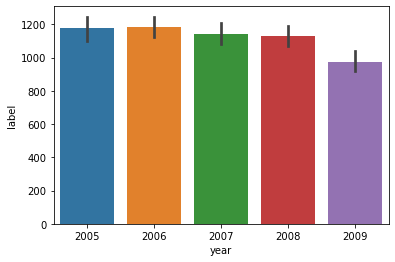

In [12]:
sns.barplot(data=X_final,x="year", y="label")

<AxesSubplot:xlabel='month', ylabel='label'>

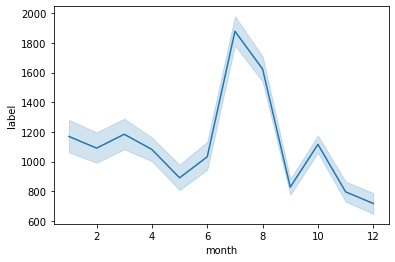

In [13]:

sns.lineplot(data=X_raw, x="month", y="label")

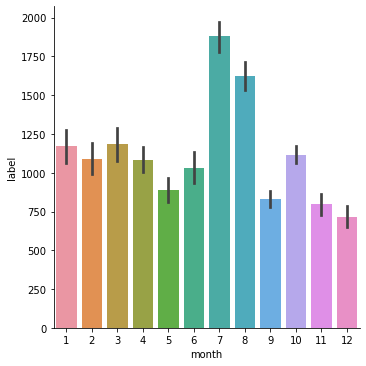

In [14]:
sns.catplot(data=X_raw, x="month", y="label",kind="bar")

<AxesSubplot:xlabel='sunshine_hours', ylabel='label'>

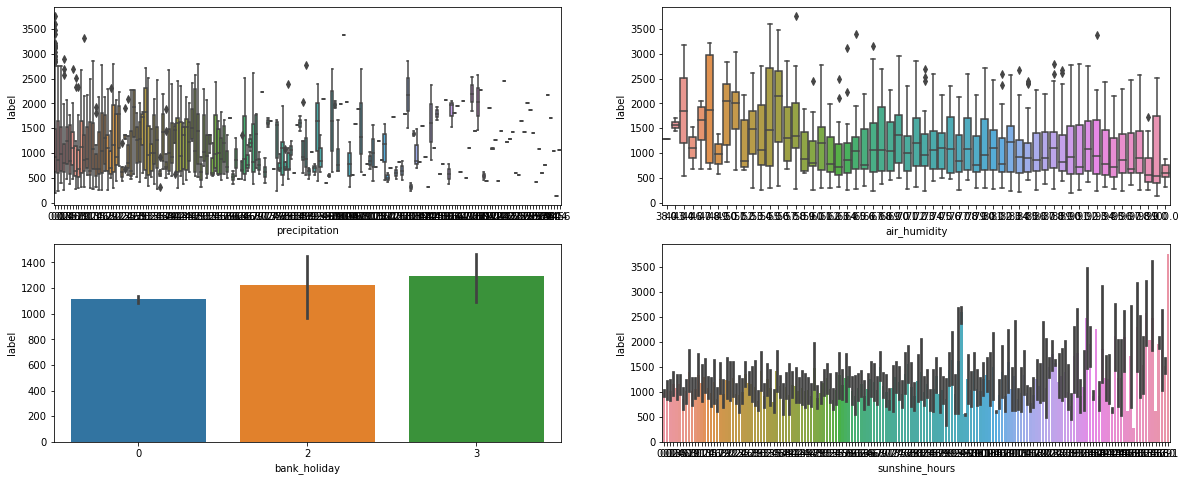

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)
sns.boxplot(data=X_final, x="precipitation", y="label", ax=axes[0][0]) 
sns.boxplot(data=X_final, x="air_humidity", y="label", ax=axes[0][1]) #Working day
sns.barplot(data=X_final, x="bank_holiday", y="label", ax=axes[1][0]) #Holiday
sns.barplot(data=X_final, x="sunshine_hours", y="label", ax=axes[1][1]) 

(array([170., 644., 269., 270., 199., 112.,  45.,  23.,   7.,   4.]),
 array([ 142. ,  503.9,  865.8, 1227.7, 1589.6, 1951.5, 2313.4, 2675.3,
        3037.2, 3399.1, 3761. ]),
 <BarContainer object of 10 artists>)

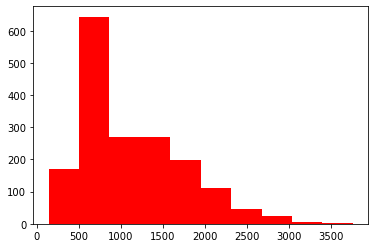

In [16]:
plt.hist(X_final["label"],color="red")

In [17]:
X_final["label"]=np.log1p(X_final["label"])

(array([  2.,  21.,  46., 144., 445., 272., 285., 339., 161.,  28.]),
 array([4.96284463, 5.28983077, 5.61681691, 5.94380304, 6.27078918,
        6.59777532, 6.92476146, 7.2517476 , 7.57873373, 7.90571987,
        8.23270601]),
 <BarContainer object of 10 artists>)

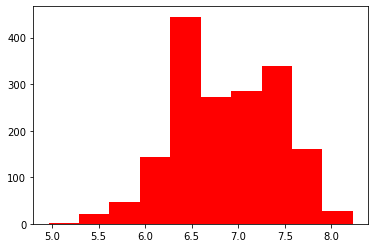

In [18]:
plt.hist(X_final["label"],color="red")

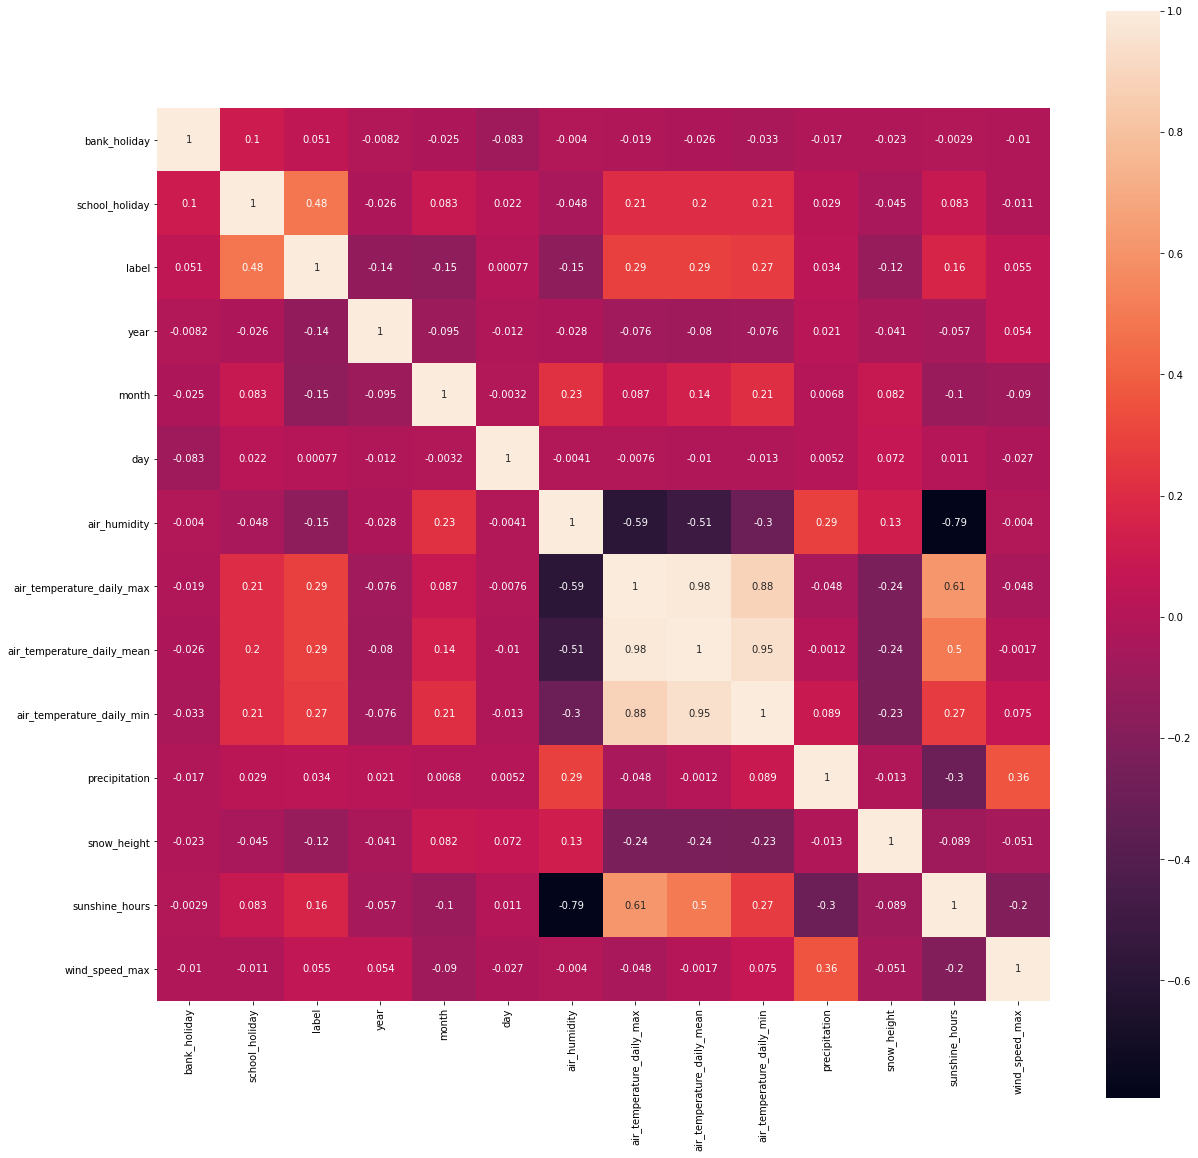

In [19]:
fig = plt.figure(figsize=[20,20]) #Heat map
ax = sns.heatmap(X_final.corr(),annot=True,square=True)

In [22]:
X_final.drop(X_final[X_final["bank_holiday"]==3,axis=0])

,bank_holiday,school_holiday,label,year,month,day,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
5,3,3,7.693482,2005,3,25,89.0,15.5,11.6,9.1,2.2,0,1.6,8.5
8,3,3,7.571988,2005,3,28,89.0,13.5,10.5,8.7,2.0,0,0.5,6.6
42,3,0,6.990257,2005,5,1,71.0,27.5,18.7,8.4,0.0,0,11.6,5.9
46,3,0,7.163947,2005,5,5,66.0,14.0,9.5,3.7,3.9,0,6.5,12.7
57,3,0,7.440147,2005,5,16,81.0,15.8,9.4,3.5,1.7,0,1.8,10.4
197,3,0,7.433075,2005,10,3,90.0,16.0,9.8,4.7,0.0,0,6.9,6.9
280,3,3,6.505784,2005,12,26,90.0,3.2,-0.1,-2.8,1.7,0,0.6,7.5
286,3,3,6.263398,2006,1,1,91.0,5.3,4.0,1.3,1.5,0,0.0,8.1
389,3,3,7.336937,2006,4,14,69.0,13.1,8.5,3.7,0.2,0,5.0,14.2
392,3,3,7.303170,2006,4,17,72.0,15.3,10.2,7.7,0.1,0,2.5,12.7
